In [24]:
pip install geopandas

In [0]:
import geopandas as gpd

In [0]:
import plotly.graph_objects as go
import pandas as pd
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
from datetime import datetime
from plotly.subplots import make_subplots
%matplotlib inline

In [0]:
raw= requests.get("http://covid19-india-adhikansh.herokuapp.com/states")
raw_json = raw.json()
df = pd.DataFrame(raw_json["state"])

In [28]:
df.head()

,_id,name,active,cured,death,total
0,5ed387946094abebeaa6e75a,Andaman and Nicobar Islands,0,33,0,33
1,5ed387946094abebeaa6e75b,Andhra Pradesh,2031,2745,75,4851
2,5ed387956094abebeaa6e75c,Arunachal Pradesh,50,1,0,51
3,5ed387966094abebeaa6e75d,Assam,2107,665,4,2776
4,5ed387966094abebeaa6e75e,Bihar,2672,2499,31,5202


In [29]:
df.set_index("_id")

,name,active,cured,death,total
_id,,,,,
5ed387946094abebeaa6e75a,Andaman and Nicobar Islands,0,33,0,33
5ed387946094abebeaa6e75b,Andhra Pradesh,2031,2745,75,4851
5ed387956094abebeaa6e75c,Arunachal Pradesh,50,1,0,51
5ed387966094abebeaa6e75d,Assam,2107,665,4,2776
5ed387966094abebeaa6e75e,Bihar,2672,2499,31,5202
5ed387966094abebeaa6e75f,Chandigarh,39,273,5,317
5ed387976094abebeaa6e760,Chhattisgarh,848,308,4,1160
5ed387976094abebeaa6e761,Dadar Nagar Haveli,20,2,0,22
5ed387986094abebeaa6e762,Delhi,17712,11357,874,29943


In [0]:
df=df[["name","active","death","cured"]]

In [31]:
df

,name,active,death,cured
0,Andaman and Nicobar Islands,0,0,33
1,Andhra Pradesh,2031,75,2745
2,Arunachal Pradesh,50,0,1
3,Assam,2107,4,665
4,Bihar,2672,31,2499
5,Chandigarh,39,5,273
6,Chhattisgarh,848,4,308
7,Dadar Nagar Haveli,20,0,2
8,Delhi,17712,874,11357
9,Goa,263,0,67


In [0]:
total_confirmed = df["active"].sum()
total_recovered = df["cured"].sum()
total_deaths = df["death"].sum()

In [33]:
fp = "/content/drive/My Drive/Indian_States.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
map_df["st_nm"].replace({"Dadara & Nagar Havelli": "Dadar Nagar Haveli", "Andaman & Nicobar Island": "Andaman and Nicobar Islands", "Arunanchal Pradesh": "Arunachal Pradesh","Jammu & Kashmir":"Jammu and Kashmir","NCT of Delhi":"Delhi","Telangana":"Telengana"}, inplace=True)

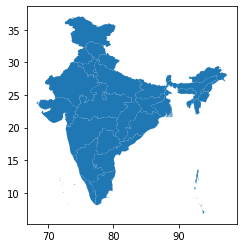

In [36]:
map_df.plot()

In [37]:

# join the geodataframe with the dataframe
merged = map_df.set_index('st_nm').join(df.set_index('name'))
#deleting states which are not present in either of the dataframes
merged.drop(['Lakshadweep', 'Daman & Diu'])

,geometry,active,death,cured
st_nm,,,,
Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.0,0.0,33.0
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",50.0,0.0,1.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2107.0,4.0,665.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2672.0,31.0,2499.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",39.0,5.0,273.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",848.0,4.0,308.0
Dadar Nagar Haveli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",20.0,0.0,2.0
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",263.0,0.0,67.0
Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",5309.0,1280.0,13956.0


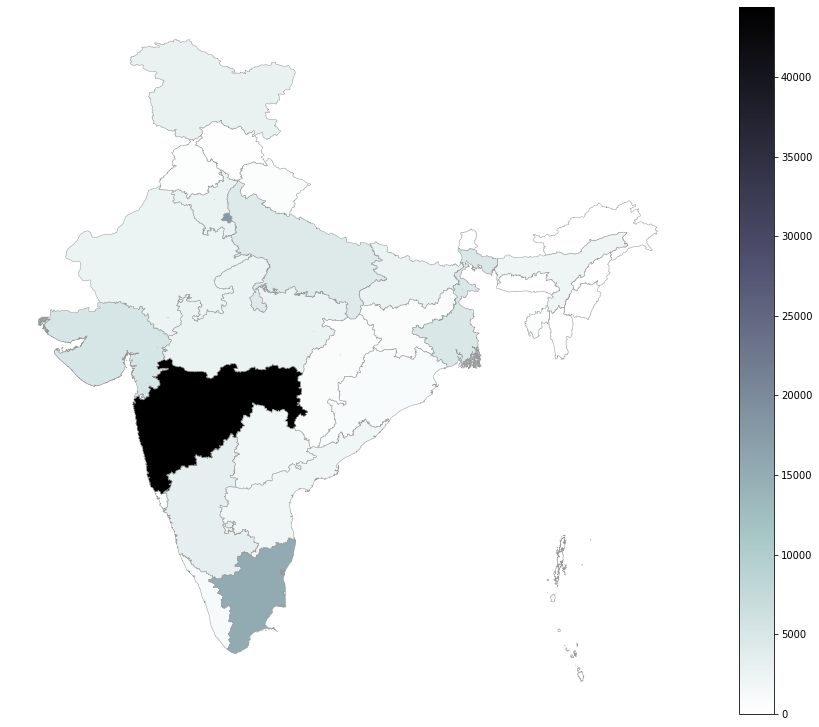

In [38]:
variable = 'active'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(18, 13))
ax.axis('off')
merged.plot(column=variable, cmap='bone_r', linewidth=0.5, ax=ax, edgecolor='0.6', legend='True')


